# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 11.01 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

## 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
faces = np.array([1,2,3,4,5,6])

# By hand
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i], faces[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)

expected_value_hand = sum(k * p for k, p in zip(range(1, 7), pdf))

print("Theoretical Probabilities (PDF):", pdf)
print("Theoretical Expected Value (By Hand):", expected_value_hand)

Theoretical Probabilities (PDF): [0.30555556 0.25       0.19444444 0.13888889 0.08333333 0.02777778]
Theoretical Expected Value (By Hand): 2.5277777777777777


1, 2, and 3 are more likely than the single die probability of 1/6 while 4, 5, and 6 are less likely.

In [4]:
# Bootstrap
N = 1000
d1 = np.random.choice(faces, size = N)
d2 = np.random.choice(faces, size = N)
min_roll = [min([d1[i], d2[i]]) for i in range(N)]

epdf = np.zeros(6)
for i in range(6):
    epdf[i] = (1/N)*np.sum(min_roll == faces[i])

ecdf = np.cumsum(epdf)

expected_value_sim = np.mean(min_roll)

print("Simulated Probabilities (PDF):", epdf)
print("Simulated Expected Value:", expected_value_sim)

Simulated Probabilities (PDF): [0.299 0.256 0.192 0.144 0.08  0.029]
Simulated Expected Value: 2.537


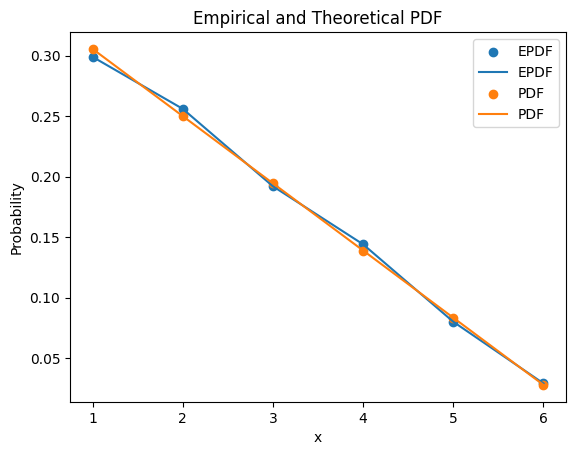

In [5]:
# PDF Comparison:
plt.scatter(faces,epdf,label='EPDF')
plt.plot(faces,epdf,label='EPDF')
plt.scatter(faces,pdf,label='PDF')
plt.plot(faces,pdf,label='PDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.title('Empirical and Theoretical PDF')
plt.show()

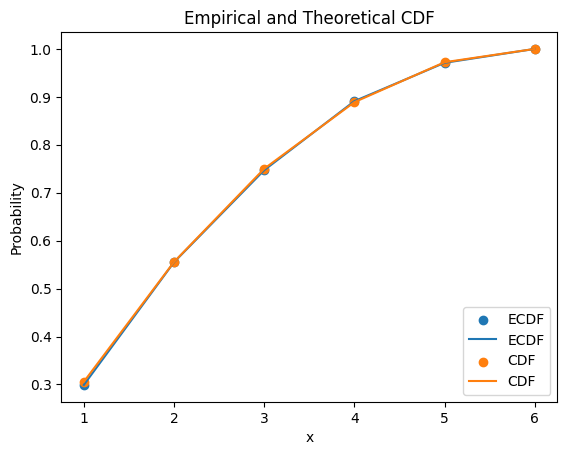

In [6]:
# CDF Comparison:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

## 2

In [7]:
faces = np.array([1,2,3,4,5,6])
N = 5000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)
med_roll = [int(np.median([d1[i], d2[i], d3[i]])) for i in range(N)]

epdf = np.zeros(6)
for i in range(6):
    epdf[i] = (1/N)*np.sum(med_roll == faces[i])

ecdf = np.cumsum(epdf)
expected_value = np.sum(med_roll)/N

print("Simulated Probabilities (PDF):", epdf)
print("Simulated Expected Value:", expected_value)

Simulated Probabilities (PDF): [0.075  0.1784 0.2442 0.2472 0.1848 0.0704]
Simulated Expected Value: 3.4996


2, 3, 4, and 5 are more likely than the single die probability of 1/6 while 1 and 6 are less likely.

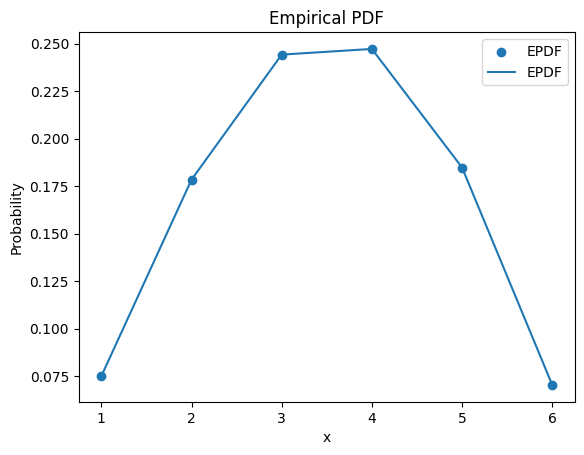

In [8]:
# PDF:
plt.scatter(faces,epdf,label='EPDF')
plt.plot(faces,epdf,label='EPDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.title('Empirical PDF')
plt.show()

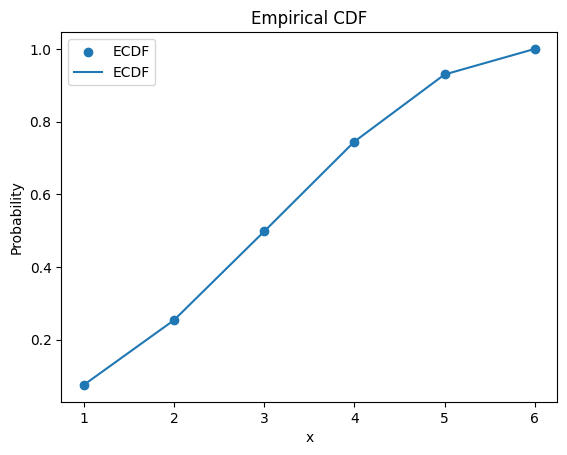

In [9]:
# CDF:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.title('Empirical CDF')
plt.show()

##3

In [10]:
N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

results = pd.DataFrame(results)

print(results.describe())


                  0
count  50000.000000
mean       4.219320
std        3.294686
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       41.000000


The expected value is the mean: 4.219.

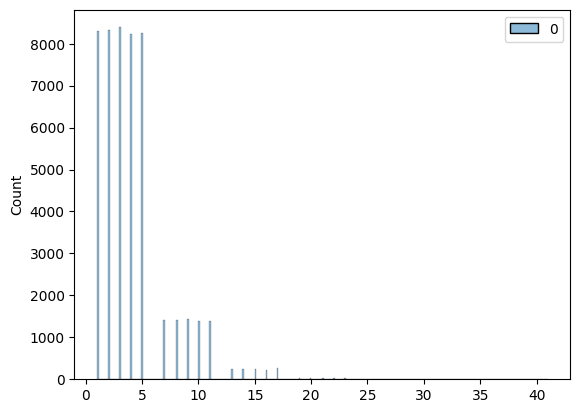

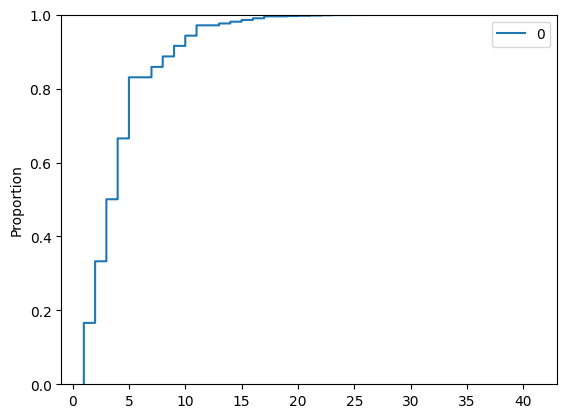

In [13]:
sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()

The probability of each number is shown by the histogram and the cdf. As expected, getting numbers 1 through 5 is the most common outcome and there is an equal chance around 0.17 for each of these. There is no chance of getting a multiple of 6 because this would lead to another roll. There is a lower but equal chance with each additional set range of numbers (ex: 7 through 11).

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

## 1

In [15]:
df = pd.read_csv('the_bootstrap/data/mammogram.csv')

In [17]:
print(pd.crosstab(df['treatment'], df['breast_cancer_death']) , '\n')
print(pd.crosstab(df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')


breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 



In [20]:
control_survival = 44405/(44405+505)
mammogram_survival = 44425/(44425+500)

difference = mammogram_survival - control_survival
print(difference)
print("The mammogram group's survival rate was greater than the control group's survival rate by: ", difference)

0.00011505110015985753
The mammogram group's survival rate was greater than the control group's survival rate by:  0.00011505110015985753


##2

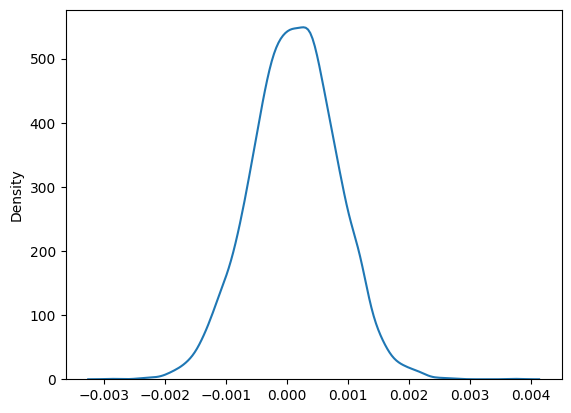

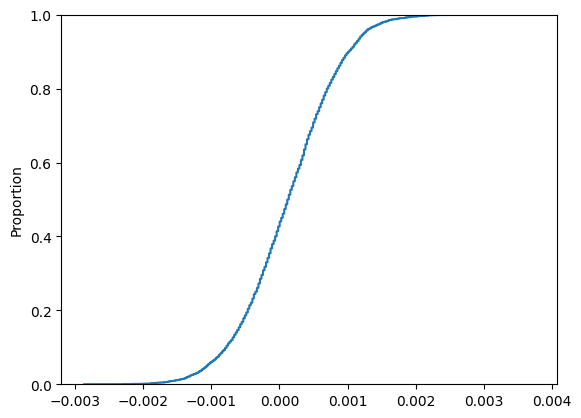

In [21]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)

    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

##3

In [22]:
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )

99% confidence interval: ( -0.0016884731064800978 ,  0.0020072278855615094 )


The 99% confidence interval goes from -0.0017 to 0.0020, so it does include 0.

##4

Based on these findings, it would seem that mammograms are not superior to traditional breast cancer screenings in preventing breast cancer deaths. However, these findings are limited, and there could be many other factors at play leading to the lack of a difference in survival between the two groups.
These results may understate conclusions due to the 25 year survival rate being a very long timeline over which breast cancer might not even be the cause of death. It would be helpful to have shorter time frame survival rates like 5 years, which is commonly used in medicine, or 10 years to see more direct effects. It would also be helpful to have information on age at diagnosis to see if this is any different between the two groups. For example, younger patients might not get mammograms but have a better survival rate due to easier recovery at a younger age. Other patient information could further contextualize the results like medical history, genetic predispositions, racial demographics, and socioeconomic factors. The data could be further broken down into groups to see if trends stand across age groups, or races, or socioeconomic groups. Other response variables could also be helpful like quality of life or treatment satisfaction rather than only focusing on mortality over such an extended time period.